In [30]:
from src import analysis_utils as utils
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline 
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<B> Experiment 18: Negative control </B>, 47 tRNAEFTu, 7 ribosomes, 0 tRNAsynth, 0 aa, 85nm side (phi=~0.22). 
No collisions between tRNA-tRNA, ribosome-ribosome, and tRNA-ribosome (free diffusion with no volume exclusion) using an effective diffusion coefficient for tRNA-efTu (43 diffusion). Shown at 3 different time scales (1ms, 10ms, 100ms)

Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)


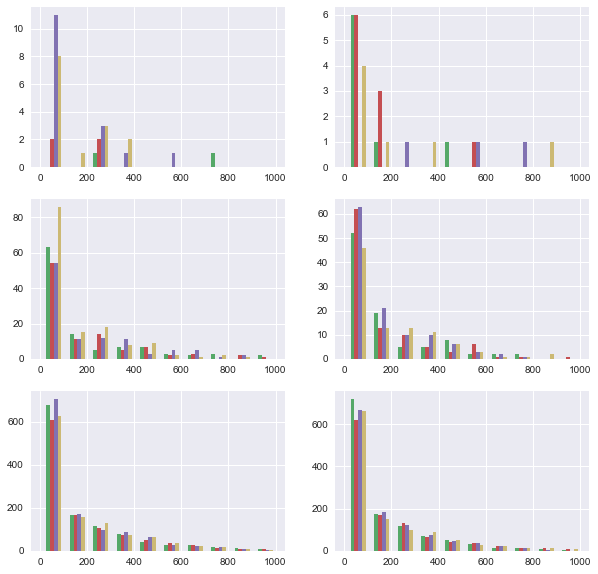

In [52]:
expt18_df=utils.readSimData("data/expt18_47tRNAEfTu_7ribosome_0tRNASynth_0aa_85nmSidelength_20180426.xls")
expt18_df_split = utils.timeSplitter(expt18_df, scale="log")
fig,ax=plt.subplots(3,2,figsize=(10,10))
for i,val in enumerate(expt18_df_split):
    expt18_df_incorr=utils.countIncorrectRibosomeCollisions(pd.concat(expt18_df_split[0:i+1]),np.arange(0,5),np.arange(48,55));
    ax[i,0].hist(expt18_df_incorr[0],bins=10,range=(1,1000));
    ax[i,1].hist(expt18_df_incorr[3],bins=10,range=(1,1000));



At long enough timescales, sampling follows a poisson-like distribution if there is no crowding effects. This is still an interesting detail, as current models just use the mean sampling time even though the distribution is so wide. Will need to consider where the effects of such a distribution would matter most.

<B>Experiment 19: Positive Control</B>, 188 tRNA, 7 ribosomes, hard sphere closed boundary. Do with same volume as negative control. Phi = 

Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)


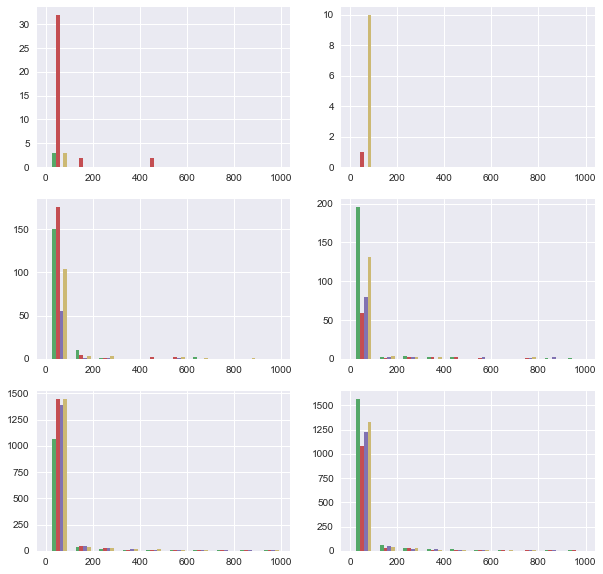

In [56]:
expt19_df=utils.readSimData("data/expt19_188tRNAEfTu_7ribosome_0tRNASynth_0aa_85nmSidelength_20180426.xls")
expt19_df_split = utils.timeSplitter(expt19_df, scale="log")
fig,ax=plt.subplots(3,2,figsize=(10,10))
for i,val in enumerate(expt19_df_split):
    expt19_df_incorr=utils.countIncorrectRibosomeCollisions(pd.concat(expt19_df_split[0:i+1]),np.arange(0,5),np.arange(189,196));
    ax[i,0].hist(expt19_df_incorr[0],bins=10,range=(1,1000));
    ax[i,1].hist(expt19_df_incorr[3],bins=10,range=(1,1000));

Note: It isn't that there is no long tail in the positive control above. It's that there's so much caging, that either the tRNA is always immediately interacting with the ribosome, or it has a gap of 10k+ wrong interactions before the correct one can arrive again.

<B>Experiment 10</B>: Biologically relevant concentration. 47 tRNAEFTu, 7 ribosomes, 8 tRNAsynth, 863 aa, 85nm side (phi=~0.22)

Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)


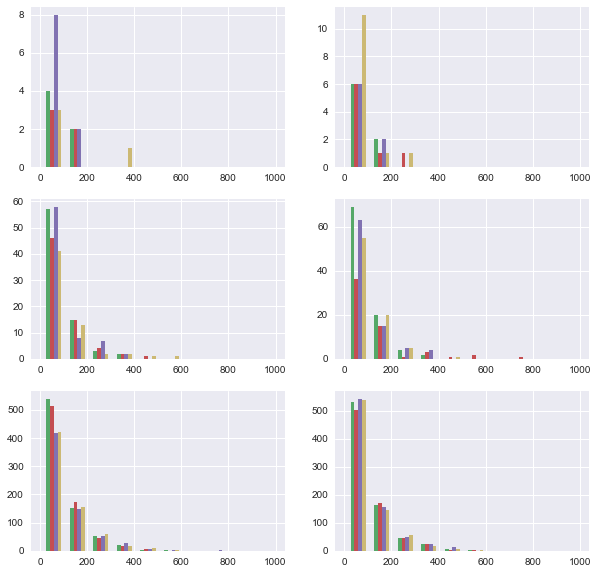

In [57]:
expt10_df=utils.readSimData("data/expt10_47tRNAEfTu_7ribosome_8tRNASynth_863aa_85nmSidelength_20180424.xls")
expt10_df_split = utils.timeSplitter(expt10_df, scale="log")
fig,ax=plt.subplots(3,2,figsize=(10,10))
for i,val in enumerate(expt10_df_split):
    expt10_df_incorr=utils.countIncorrectRibosomeCollisions(pd.concat(expt10_df_split[0:i+1]),np.arange(0,5),np.arange(48,55));
    ax[i,0].hist(expt10_df_incorr[0],bins=10,range=(1,1000));
    ax[i,1].hist(expt10_df_incorr[3],bins=10,range=(1,1000));

The tail ends slightly sooner than with the no-crowding system. This is slightly unexpected since I would have expected a longer tail distribution due to caging -- will need to investigate. Overall there are also just fewer collisions than with no crowders (negative control).

Conclusions: within a 80nm side box, tRNA-EFTus stay non uniform on the order of 10ms (though this happens even without crowding), which is surprinsingly long. This means that with more crowding or other methods of holding tRNAs-EfTu (such as many ribosomes locally that require a certain tRNA; or some sort of transient binding events to hold tRNA in place), tRNA-EfTus could be localized for longer (see positive control). We also see that the relative ratios of tRNAs-EfTus are extremely important in holding tRNAs in a volume/relative interaction with ribosome.

If we find that translation could go faster, this might suggest that tRNAs usually travel unbound and get loaded by EfTu only near their ribosome site.

If we somehow find that this model predicts known translation rates, we can start playing around with the cell composition to stress test/map phase diagram and build a synthetic cell (e.g., that expresses fast or slow or not at all or only certain proteins, or different proteins differentially based on aa composition).

#Need metrics: like average collision, "disparity btwn low and high", so can combine all these
#graphs into a couple of line graphs over various parameters

In [74]:
disparity(expt10_df_incorr[0][2])
#disparity(expt19_df_incorr[0][2])

(850, 0)

<B> Experiment 14: Extra Negative control </B>, 47 tRNAEFTu, 7 ribosomes, 0 tRNAsynth, 0 aa, 85nm side (phi=~0.22). 
No collisions between tRNA-tRNA, ribosome-ribosome, and tRNA-ribosome (free diffusion with no volume exclusion) using an effective diffusion coefficient for tRNA-efTu (2.5 instead of 43)

Initial ribosome x tRNA x collisionGapNumber has shape: (7, 5, 0)


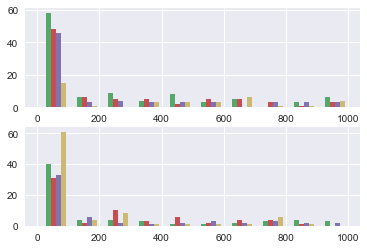

In [46]:
expt14_df=utils.readSimData("data/expt14_47tRNAEfTu_7ribosome_0tRNASynth_0aa_85nmSidelength_20180424.xls")
expt14_df_incorr=utils.countIncorrectRibosomeCollisions(expt14_df,np.arange(0,5),np.arange(48,55));
fig,ax=plt.subplots(2,1)
ax[0].hist(expt14_df_incorr[0],bins=10,range=(1,1000));
ax[1].hist(expt14_df_incorr[3],bins=10,range=(1,1000));

In [72]:
def disparity(col):
    low=0
    high=0
    for i in range(len(col)):
        if col[i]<10:
            low+=1
        if col[i]>1000:
            high+=1
    return low, high